Author: Ganesh Sreeram

Out of sample predictability analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Data has been sourced from Amit Goyal's Website. It consists of various return predictors. 

In [3]:
predictors = pd.read_excel('PredictorData2017.xlsx',sheet_name='Monthly',index_col=[0])
predictors.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
187101,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187102,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187103,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187104,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187105,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.003691,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
predictors.dropna(inplace=True)
predictors.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
193705,16.26,0.810000,1.15000,0.489382,0.0041,0.0333,0.0484,0.0282,0.028278,0.000342,0.006993,0.0053,0.0040,0.003593,0.003398,-0.005699,-0.011686
193706,15.40,0.840000,1.17000,0.504961,0.0036,0.0328,0.0493,0.0285,0.031266,0.000300,0.000000,-0.0018,0.0053,0.002984,0.004206,-0.053803,-0.057853
193707,16.98,0.816667,1.18667,0.464649,0.0028,0.0325,0.0491,0.0277,0.027224,0.000233,0.006944,0.0138,0.0039,0.002982,0.003630,0.098991,0.098012
193708,16.04,0.793333,1.20333,0.481935,0.0029,0.0324,0.0492,0.0286,0.031064,0.000242,0.000000,-0.0104,-0.0017,0.002141,0.003325,-0.051183,-0.056291
193709,13.76,0.770000,1.22000,0.553147,0.0031,0.0328,0.0516,0.0284,0.035846,0.000258,0.006897,0.0045,0.0025,0.015821,0.003339,-0.139610,-0.143683


Looking at more recent data. 

In [6]:
predictors = predictors.loc['195001':]
predictors.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
195001,17.05,1.15,2.33667,0.791417,0.0107,0.0257,0.0324,0.0215,0.027102,0.000892,-0.004237,-0.0061,0.0037,0.000989,0.004458,0.019703,0.018245
195002,17.22,1.16,2.35333,0.784998,0.0112,0.0258,0.0324,0.0214,0.025491,0.000933,0.000000,0.0021,0.0007,0.000426,0.004246,0.019603,0.009975
195003,17.29,1.17,2.37000,0.825528,0.0112,0.0258,0.0324,0.0215,0.029291,0.000933,0.004255,0.0008,0.0022,0.000624,0.004553,0.008185,0.003542
195004,18.07,1.18,2.42667,0.796497,0.0115,0.0260,0.0323,0.0214,0.026396,0.000958,0.000000,0.0030,-0.0008,0.000714,0.004022,0.045887,0.044493
195005,18.78,1.19,2.48333,0.761346,0.0116,0.0261,0.0325,0.0213,0.028571,0.000967,0.004237,0.0033,-0.0008,0.000641,0.003803,0.046902,0.037590


Create a new DataFrame and add columns containing the earnings/price ratio, the term spread (lty minus tbl), the default spread (BAA minus AAA), and net issuance (ntis).

Note that predictive regressions are of the form
$$ R_t = \alpha + \beta X_{t-1} + \epsilon_t$$



In [7]:
#E/P
pred1 = pd.DataFrame(index=predictors.index)
pred1['E/P'] = 0
pred1['E/P'] = predictors['E12']/predictors['Index']

#Term Spread

pred1['Term Spread'] = predictors['lty'] - predictors['tbl']

#Default Spread 

pred1['Default Spread'] = predictors['BAA'] - predictors['AAA']

#Net Issuance

pred1['Net Issuance'] = predictors['ntis']

#Market Returns
pred1['MR'] = predictors['CRSP_SPvw']

#Risk Free

pred1['Rfree'] = predictors['Rfree']

#Excess Returns 

pred1['ER'] = pred1['MR'] - pred1['Rfree']

pred1['predictions'] = 0 # Column to store predictions


pred1.head()



,E/P,Term Spread,Default Spread,Net Issuance,MR,Rfree,ER,predictions
yyyymm,,,,,,,,
195001,0.137048,0.0108,0.0067,0.027102,0.019703,0.000892,0.018811,0
195002,0.136663,0.0102,0.0066,0.025491,0.019603,0.000933,0.018670,0
195003,0.137073,0.0103,0.0066,0.029291,0.008185,0.000933,0.007252,0
195004,0.134293,0.0099,0.0063,0.026396,0.045887,0.000958,0.044929,0
195005,0.132233,0.0097,0.0064,0.028571,0.046902,0.000967,0.045935,0


In [8]:
#Creating Function for regression

def regression(X,Y,xtest):
    model = sm.OLS(Y,sm.add_constant(X)).fit()
    prediction = model.params[0] + (model.params[1:] * xtest).sum()
    return model, prediction

In [9]:
#Identifying last row to end 10 year window 
pred1.index.tolist().index(199212)

515

If today is time $t$, then our goal is to forecast the stock return in date $t+1$.  This prediction will be made based on estimated $\hat{\alpha}$ and $\hat{\beta}$ from a regression run over the sample period from time $t-119$ to $t$. 

Kitchen sink approach -- that is inclusive of all the variables. 


In [12]:
#Regression

for i in range(515 + 1):
    j = i + 120
    X = pred1[['E/P', 'Term Spread', 'Default Spread', 'Net Issuance']].iloc[i:j]
    Y = pred1['ER'].iloc[i:j]
    xtest = pred1[['E/P', 'Term Spread', 'Default Spread', 'Net Issuance']].iloc[j]
    model, prediction = regression(X,Y, xtest)
    pred1['predictions'].iloc[j] = prediction

In [13]:
pred1.tail()

,E/P,Term Spread,Default Spread,Net Issuance,MR,Rfree,ER,predictions
yyyymm,,,,,,,,
200208,0.031591,0.0348,0.0121,0.024755,0.007061,0.001350,0.005711,-0.015600
200209,0.036846,0.0317,0.0125,0.029308,-0.108965,0.001358,-0.110323,-0.016782
200210,0.032992,0.0350,0.0141,0.025679,0.088599,0.001317,0.087282,-0.034504
200211,0.030339,0.0398,0.0131,0.022914,0.059019,0.001025,0.057994,-0.014952
200212,0.031359,0.0365,0.0124,0.025738,-0.058834,0.000992,-0.059826,-0.008793


In [14]:
pred1.loc['195910':'196005'] #First prediction was made on 196001

,E/P,Term Spread,Default Spread,Net Issuance,MR,Rfree,ER,predictions
yyyymm,,,,,,,,
195910,0.059400,0.0016,0.0071,0.031020,0.012574,0.003375,0.009199,0.000000
195911,0.058396,0.0017,0.0070,0.029723,0.018486,0.003458,0.015028,0.000000
195912,0.056604,-0.0002,0.0070,0.022857,0.029627,0.003742,0.025885,0.000000
196001,0.060960,0.0006,0.0073,0.022116,-0.069933,0.003625,-0.073558,0.006595
196002,0.060406,0.0033,0.0078,0.024038,0.013922,0.003300,0.010622,0.001793
196003,0.061258,0.0080,0.0076,0.025593,-0.012566,0.002758,-0.015324,0.007796
196004,0.061554,0.0103,0.0075,0.025576,-0.016113,0.002692,-0.018805,0.011053
196005,0.059168,0.0088,0.0082,0.024413,0.033513,0.002742,0.030771,0.009128


In [15]:
#Creating a new dataset that holds all the predicted values along with all the variables, from 196001 onwards
pred2 = pred1.loc['196001':]
pred2.head()


,E/P,Term Spread,Default Spread,Net Issuance,MR,Rfree,ER,predictions
yyyymm,,,,,,,,
196001,0.060960,0.0006,0.0073,0.022116,-0.069933,0.003625,-0.073558,0.006595
196002,0.060406,0.0033,0.0078,0.024038,0.013922,0.003300,0.010622,0.001793
196003,0.061258,0.0080,0.0076,0.025593,-0.012566,0.002758,-0.015324,0.007796
196004,0.061554,0.0103,0.0075,0.025576,-0.016113,0.002692,-0.018805,0.011053
196005,0.059168,0.0088,0.0082,0.024413,0.033513,0.002742,0.030771,0.009128


Weghting the strategy 150/50 

In [16]:
#Weights
pred2['Weights'] = 0
pred2['Weights'] = np.minimum(1.5, np.maximum(-0.5, 100*pred2['predictions']))
pred2.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,E/P,Term Spread,Default Spread,Net Issuance,MR,Rfree,ER,predictions,Weights
yyyymm,,,,,,,,,
196001,0.060960,0.0006,0.0073,0.022116,-0.069933,0.003625,-0.073558,0.006595,0.659515
196002,0.060406,0.0033,0.0078,0.024038,0.013922,0.003300,0.010622,0.001793,0.179339
196003,0.061258,0.0080,0.0076,0.025593,-0.012566,0.002758,-0.015324,0.007796,0.779611
196004,0.061554,0.0103,0.0075,0.025576,-0.016113,0.002692,-0.018805,0.011053,1.105284
196005,0.059168,0.0088,0.0082,0.024413,0.033513,0.002742,0.030771,0.009128,0.912771


In [17]:
#Excess Portfolio Returns
pred2['excess portfolio return'] = 0
pred2['excess portfolio return'].iloc[1:] = (pred2['Weights'].values[0:-1] * pred2['ER'].values[1:])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
pred2.head()

,E/P,Term Spread,Default Spread,Net Issuance,MR,Rfree,ER,predictions,Weights,excess portfolio return
yyyymm,,,,,,,,,,
196001,0.060960,0.0006,0.0073,0.022116,-0.069933,0.003625,-0.073558,0.006595,0.659515,0.000000
196002,0.060406,0.0033,0.0078,0.024038,0.013922,0.003300,0.010622,0.001793,0.179339,0.007005
196003,0.061258,0.0080,0.0076,0.025593,-0.012566,0.002758,-0.015324,0.007796,0.779611,-0.002748
196004,0.061554,0.0103,0.0075,0.025576,-0.016113,0.002692,-0.018805,0.011053,1.105284,-0.014660
196005,0.059168,0.0088,0.0082,0.024413,0.033513,0.002742,0.030771,0.009128,0.912771,0.034011


In [19]:
#Returns with risk free 
pred2['portfolio return'] = 0
pred2['portfolio return'] = pred2['excess portfolio return'] + pred2['Rfree']



/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


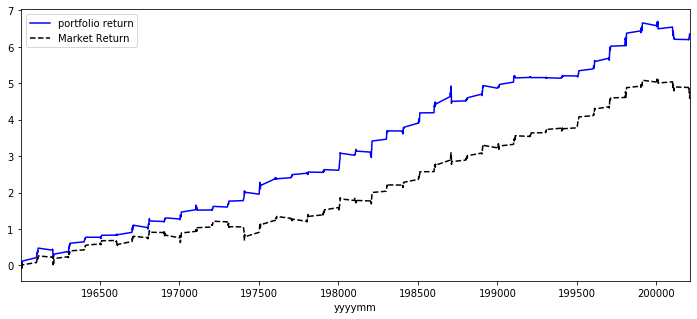

In [24]:
#visualizing the results, looks like the portfolio returns are much higher
pr= pred2['portfolio return'].cumsum()
pr.plot(color='b')
mr = pred2['MR'].cumsum()
mr.plot( style= 'k--', label = 'Market Return', figsize=(12,5))
plt.legend()
plt.show()

In [25]:
#Performance Evaluation 

#Sharpe Ratio 

Sharpe1 = pred2['excess portfolio return'].mean()/pred2['portfolio return'].std() *np.sqrt(12)
Sharpe2 = pred2['ER'].mean()/pred2['MR'].std() *np.sqrt(12)

print('Portfolio Sharpe Ratio:', Sharpe1,'    ','Market Sharpe Ratio:',Sharpe2)

#Mean and Std. Deviation 

pred2[['portfolio return', 'MR', 'excess portfolio return', 'ER']].describe()

Portfolio Sharpe Ratio: 0.5266279038619357      Market Sharpe Ratio: 0.3348368306602449


,portfolio return,MR,excess portfolio return,ER
count,516.000000,516.000000,516.000000,516.000000
mean,0.012245,0.009060,0.007394,0.004209
std,0.048635,0.043542,0.048624,0.043661
min,-0.326247,-0.215795,-0.331355,-0.220903
25%,-0.009569,-0.016150,-0.015343,-0.021125
50%,0.008883,0.010697,0.004106,0.006358
75%,0.035119,0.037562,0.029875,0.032533
max,0.200512,0.168113,0.195987,0.161896


The portfolio has a higher average return than simply investing in the market, but that comes with 
a tradeoff of higher risk. Overall the portfolio has a higher sharpe ratio and is beating the market.


Correlation Screening

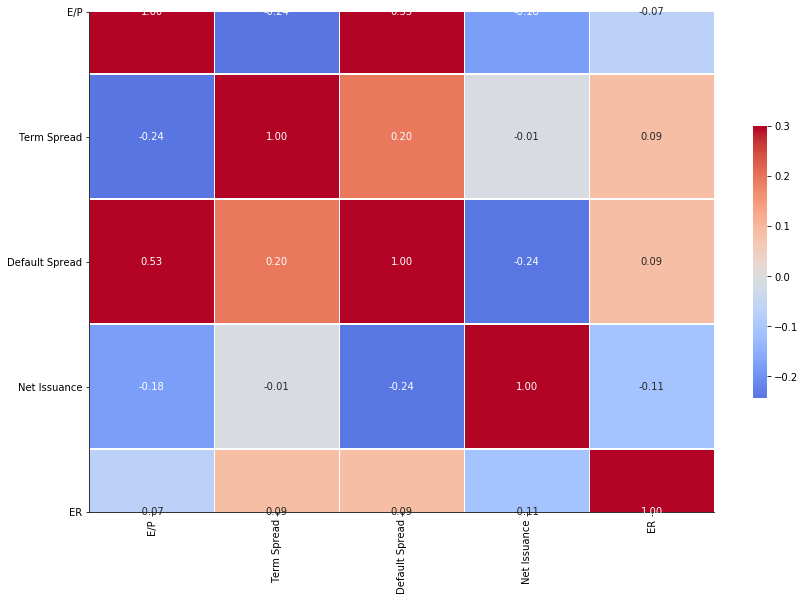

In [26]:
#Correlation Screening

import seaborn as sns

corr = pred2[['E/P', 'Term Spread', 'Default Spread', 'Net Issuance','ER']].corr()

g = sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm') 
sns.despine()
g.figure.set_size_inches(14,10) 
plt.show()

If I were to run this again I would run a regression with only one variable and that would be Net Issuance. However, baucause of a small correlation all the variations converge towards the main models result. 

In [27]:
#Regression
pred1['prediction2']= 0

for i in range(515 + 1):
    j = i + 120
    #X = pred1[['Term Spread', 'Default Spread']].iloc[i:j]
    X = pred1[['Net Issuance']].iloc[i:j]
    Y = pred1['ER'].iloc[i:j]
    xtest = pred1[['Net Issuance']].iloc[j]
    model, prediction = regression(X,Y, xtest)
    pred1['prediction2'].iloc[j] = prediction

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
#Creating a new dataset that holds all the predicted values along with all the variables, from 196001 onwards
pred3 = pred1.loc['196001':]
pred3.head()

#Weights
pred3['Weights'] = 0
pred3['Weights'] = np.minimum(1.5, np.maximum(-0.5, 100*pred2['predictions']))
pred3.head()

#Excess Portfolio Returns

pred3['excess portfolio return'] = 0
pred3['excess portfolio return'].iloc[1:] = (pred3['Weights'].values[0:-1] * pred3['ER'].values[1:])

#Returns with risk free 
pred3['portfolio return'] = 0
pred3['portfolio return'] = pred3['excess portfolio return'] + pred3['Rfree']


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

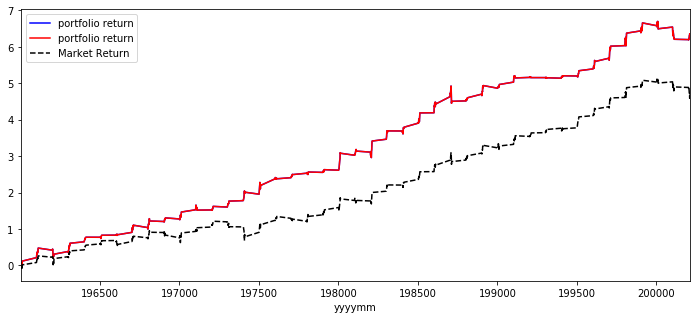

In [29]:
#visualizing the results, looks like the portfolio returns are much higher
pr= pred2['portfolio return'].cumsum()
pr.plot(color='b')
pr2=pred3['portfolio return'].cumsum()
pr2.plot(color='r')
mr = pred2['MR'].cumsum()
mr.plot( style= 'k--', label = 'Market Return', figsize=(12,5))
plt.legend()
plt.show()

In [30]:
#Performance Evaluation 

#Sharpe Ratio 

Sharpe1 = pred3['excess portfolio return'].mean()/pred3['portfolio return'].std() *np.sqrt(12)
Sharpe2 = pred2['ER'].mean()/pred2['MR'].std() *np.sqrt(12)

print('Portfolio Sharpe Ratio:', Sharpe1,'    ','Market Sharpe Ratio:',Sharpe2)

#Mean and Std. Deviation 

pred3[['portfolio return', 'MR', 'excess portfolio return', 'ER']].describe()

Portfolio Sharpe Ratio: 0.5266279038619357      Market Sharpe Ratio: 0.3348368306602449


,portfolio return,MR,excess portfolio return,ER
count,516.000000,516.000000,516.000000,516.000000
mean,0.012245,0.009060,0.007394,0.004209
std,0.048635,0.043542,0.048624,0.043661
min,-0.326247,-0.215795,-0.331355,-0.220903
25%,-0.009569,-0.016150,-0.015343,-0.021125
50%,0.008883,0.010697,0.004106,0.006358
75%,0.035119,0.037562,0.029875,0.032533
max,0.200512,0.168113,0.195987,0.161896


As it can be seen this test yields the same result. However, this might not be the case with other variables. 

Since, this model has only 4 variables-correlation screening is effective. A lasso can be used if the model had more variables. 